In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Septimo Semestre/NLP/Final/DisneylandReviews.csv', encoding = 'ISO-8859-1')
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [8]:
import tensorflow as tf

#Probar si tensorflow esta corriendo en una GPU
if tf.test.gpu_device_name():
  print(f'Se encontro el siguiente GPU: {tf.test.gpu_device_name()}')
else:
  print("Dewey esta no es tu familia")

Se encontro el siguiente GPU: /device:GPU:0


In [9]:
df.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [10]:
df.head(3)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong


<Axes: >

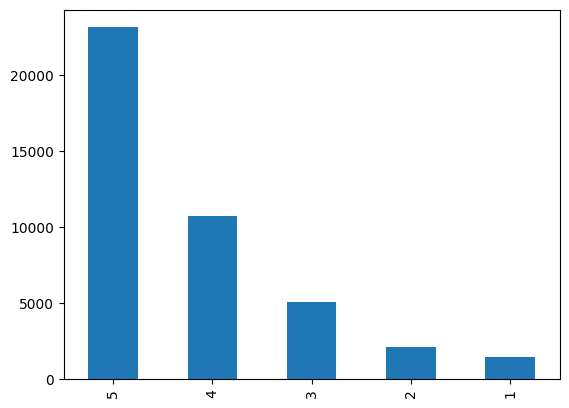

In [11]:
df['Rating'].value_counts().plot(kind="bar")

In [12]:
positivas = [4, 5]
neutras = [3]
negativas = [2,1]

df_pos = df[df['Rating']. isin(positivas)]
df_neu = df[df['Rating']. isin(neutras)]
df_neg = df[df['Rating']. isin(negativas)]

In [13]:
data_pos = ' '.join(df_pos['Review_Text']).splitlines(keepends = True)
data_neu = ' '.join(df_neu['Review_Text']).splitlines(keepends = True)
data_neg = ' '.join(df_neg['Review_Text']).splitlines(keepends = True)

In [14]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

In [15]:
tokenizer_pos = Tokenizer()
tokenizer_neu = Tokenizer()
tokenizer_neg = Tokenizer()
tokenizer_pos.fit_on_texts(data_pos)
tokenizer_neu.fit_on_texts(data_neu)
tokenizer_neg.fit_on_texts(data_neg)

In [18]:
tokenizer_pos.word_counts

OrderedDict()

In [17]:
tokenizer_pos.word_index
tokenizer_neu.word_index
tokenizer_neg.word_index

{}

In [19]:
encoded_textP = tokenizer_pos.texts_to_sequences(data_pos)
encoded_textNeu = tokenizer_neu.texts_to_sequences(data_neu)
encoded_textNeg = tokenizer_neg.texts_to_sequences(data_neg)


In [20]:
tokenizer_pos.texts_to_sequences(['awesome lovely nice'])

[[]]

In [23]:
tokenizer_neu.texts_to_sequences(['Objective Rational Neutral'])

[[]]

In [24]:
tokenizer_neg.texts_to_sequences(['waste hate bad'])


[[]]

In [25]:
vocab_sizeP = len(tokenizer_pos.word_counts) + 1
vocab_sizeNeu = len(tokenizer_neu.word_counts) + 1
vocab_sizeNeg = len(tokenizer_neg.word_counts) + 1

vocab_sizeP
vocab_sizeNeu
vocab_sizeNeg


1

In [26]:
datalistP = []
#Sacamos el valor de la ultima palabra de cada arreglo que es una secuencia
for d in encoded_textP:
  if len(d) > 1:
    for i in range(2,len(d)):
      datalistP.append(d[:i])
datalistP

[]

In [27]:
datalistNeu = []
#Sacamos el valor de la ultima palabra de cada arreglo que es una secuencia
for d in encoded_textNeu:
  if len(d) > 1:
    for i in range(2,len(d)):
      datalistNeu.append(d[:i])
datalistNeu

[]

In [28]:
datalistNeg = []
#Sacamos el valor de la ultima palabra de cada arreglo que es una secuencia
for d in encoded_textNeg:
  if len(d) > 1:
    for i in range(2,len(d)):
      datalistNeg.append(d[:i])
datalistNeg

[]

In [30]:
max_len = 20
sequencesP = pad_sequences(datalistP, maxlen = max_len, padding = 'pre')
sequencesNeu = pad_sequences(datalistNeu, maxlen = max_len, padding = 'pre')
sequencesNeg = pad_sequences(datalistNeg, maxlen = max_len, padding = 'pre')


In [31]:
xP = sequencesP[:,:-1]
yP = sequencesP[:,-1]

In [32]:
xNeu = sequencesNeu[:,:-1]
yNeu = sequencesNeu[:,-1]

In [33]:
xNeg = sequencesNeg[:,:-1]
yNeg = sequencesNeg[:,-1]

In [34]:
yP = to_categorical(yP,num_classes = vocab_sizeP)
yNeu = to_categorical(yNeu,num_classes = vocab_sizeNeu)
yNeg = to_categorical(yNeg,num_classes = vocab_sizeNeg)

In [35]:
seq_lenP = xP.shape[1]
seq_lenNeu = xNeu.shape[1]
seq_lenNeg = xNeg.shape[1]


In [37]:
from keras.src.mixed_precision.loss_scale_optimizer import optimizer
from keras.api._v2.keras import activations
modelP = Sequential()
modelP.add(Embedding(vocab_sizeP, 50, input_length = seq_lenP))
modelP.add(LSTM(100, return_sequences=True))
modelP.add(LSTM(100))
modelP.add(Dense(100, activation='relu'))
modelP.add(Dense(vocab_sizeP, activation = 'softmax'))
modelP.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics =['accuracy'])

In [38]:
modelNeu = Sequential()
modelNeu.add(Embedding(vocab_sizeNeu, 50, input_length = seq_lenNeu))
modelNeu.add(LSTM(100, return_sequences=True))
modelNeu.add(LSTM(100))
modelNeu.add(Dense(100, activation='relu'))
modelNeu.add(Dense(vocab_sizeNeu, activation = 'softmax'))
modelNeu.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics =['accuracy'])

In [39]:
modelNeg = Sequential()
modelNeg.add(Embedding(vocab_sizeNeg, 50, input_length = seq_lenNeg))
modelNeg.add(LSTM(100, return_sequences=True))
modelNeg.add(LSTM(100))
modelNeg.add(Dense(100, activation='relu'))
modelNeg.add(Dense(vocab_sizeNeg, activation = 'softmax'))
modelNeg.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics =['accuracy'])

In [40]:
review_len = 20 #Palabras por linea

def generate_lyric(seed_text, n_line, tokenizer, model, seq_len):
  for i in range(n_line):
    text = []
    for _ in range(review_len):
      encoded = tokenizer.texts_to_sequences([seed_text]) #Agarra el texto semilla
      encoded = pad_sequences(encoded, maxlen = seq_len, padding = 'pre') #la codificas
      y_pred = np.argmax(model.predict(encoded, verbose = 0), axis = -1)#la llenas de 0, y predice el eje de las filas
      predicted_word = ''
      for word, index in tokenizer.word_index.items(): # Para buscar la el indice en el tokenizer, y si si existe la convierte en el predicted word
        if index == y_pred:
          predicted_word = word
          break
      seed_text = seed_text + ' ' + predicted_word
      text.append(predicted_word)
    seed_text = text[-1] #Primer palabra de la linea nueva es la primera palabra de la linea anterior
    text = ' '.join(text)
    print(text)

In [41]:
generate_lyric("by the window", 5, tokenizer_pos,modelP, seq_lenP)

In [42]:
generate_lyric("by the window", 5, tokenizer_neu,modelNeu, seq_lenNeu)

In [43]:
generate_lyric("by the window", 5, tokenizer_neg,modelNeg, seq_lenNeg)